## Using the Laplace Transform to solvle a differential equation

Consider solving

$$
3 \ddot{x} + 30 \dot{x} + 63 x = 4 \dot{g(t)} + 6 g(t)
$$

where

$$ 
g(t) = 5 e^{-t}
$$

and initial conditions are

$$
x(0) = 4, \dot{x}(0) = 7
$$

In [1]:
import numpy as np
import sympy
sympy.init_printing()

In [21]:
from sympy.abc import a, t, x, s, g, G, X
x, g, X = sympy.symbols('x, g, X', cls=sympy.Function)


In [4]:
x0 = 4
xd0 = 7

In [65]:
g = sympy.exp(-t)
g

### Lets try the Laplace Transform on the input and check that it works

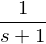

In [66]:
sympy.laplace_transform(g, t, s)[0]

### Now lets define the EOMs

sympy doesn't handle undefined functions in the Laplace transform yet, so we will input the EOMS in the Laplace domain ourselves.

https://github.com/sympy/sympy/issues/7219#issuecomment-154768904

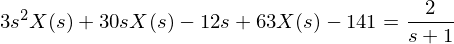

In [67]:
eoms = sympy.Eq(3*(s**2 * X(s) - s * x0 - xd0) +
               30 * (s * X(s) - x0) +
               63 * X(s), 
               sympy.laplace_transform(4 * sympy.diff(g, t) + 6 * g, t, s)[0])
eoms

### Solve for $ X(s)$

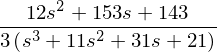

In [68]:
XofS = sympy.solve(eoms, X(s))[0]
sympy.simplify(XofS)

### Now just inverse Laplace to find the solution

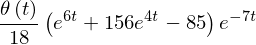

In [70]:
sol = sympy.inverse_laplace_transform(XofS, s, t)
sol

### Note

The $ \theta (t) $ is simply sympy's notation for a step function. This answer is only valid for $ t > 0$

We can generate a plot or evaluate

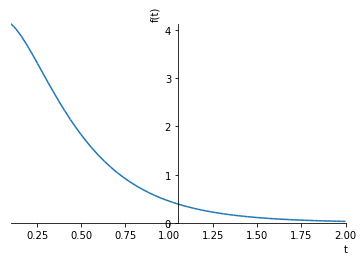

In [80]:
sympy.plot(sol, (t, 0.1, 2))

In [88]:
sol.evalf(subs={t: 5})